# Importing libraries and Dataset

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re  
import string 
import nltk
from nltk.corpus import stopwords #for cleaning 
from nltk.stem import LancasterStemmer ##for cleaning 
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score 
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('spam.csv',encoding="latin-1", usecols= ["v1", "v2"])

# Data Cleaning

In [3]:
df.shape

(5572, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.columns=["kind", "message"]
df

,kind,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
df.describe()

,kind,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["message"])

# OneHotEncoder for "kind" column
encoder = OneHotEncoder(sparse=False, drop='first')
Y = encoder.fit_transform(df[["kind"]])
X_combined = np.hstack((X.toarray(), Y))

print(X_combined)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Data Visualization

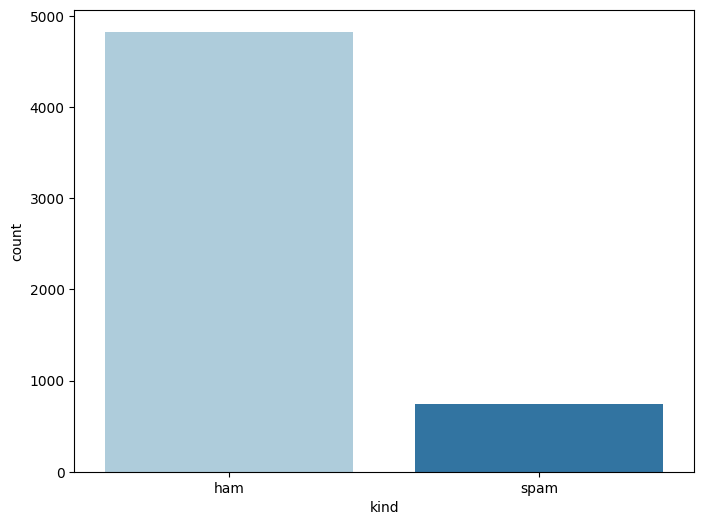

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x="kind", data=df, palette="Paired")
plt.show()

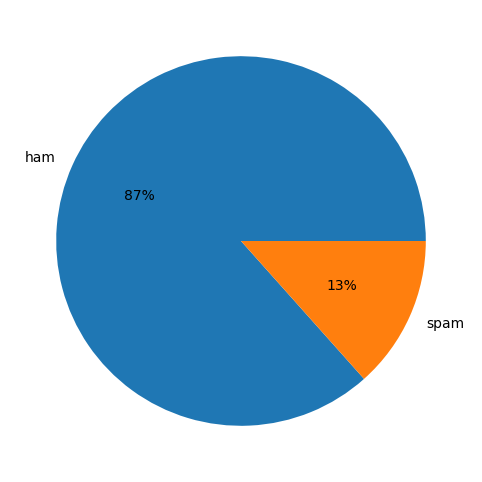

In [10]:
plt.figure(figsize=(8, 6))
kind_counts = df["kind"].value_counts()
plt.pie(kind_counts, labels=kind_counts.index, autopct="%0.0f%%")
plt.show()

The above graph and pie chart shows that most of the mails in dataset are ham

# Machine Learning

In [11]:
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [12]:
model = MultinomialNB()
model.fit(X_train,Y_train)

MultinomialNB()

In [13]:
model.score(X_train,Y_train)

0.9703836661431456

In [14]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 1.])

In [15]:
accuracy = accuracy_score(Y_test, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.9623318385650225


# Accuracy = 96.2%

In [16]:
emails = [
    'Hey Hussain, can we get together to watch football game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = vectorizer.transform(emails)
model.predict(emails_count)

array([0., 0.])